In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2021-01.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.943332,6.981505,50.943501,6.981660,2021-01-02 23:57:02,2021-01-03 00:01:01,4.0,22.0,40297977,40645704,2877.0,NaN,BIKE 21596,814
1,50.943501,6.981660,50.943417,6.981606,2021-01-04 10:11:02,2021-01-05 10:18:02,1447.0,10.0,40645704,40668729,2050.0,NaN,BIKE 21596,798
2,50.943417,6.981606,50.943419,6.981562,2021-01-11 17:52:01,2021-01-11 17:57:02,5.0,3.0,40668729,40822810,9094.0,NaN,BIKE 21596,766
3,50.943419,6.981562,50.943449,6.981676,2021-01-12 18:16:01,2021-01-12 18:28:01,12.0,9.0,40822810,40844919,1459.0,NaN,BIKE 21596,747
4,50.943449,6.981676,50.943322,6.981577,2021-01-13 07:40:02,2021-01-13 07:56:02,16.0,16.0,40844919,40853561,792.0,NaN,BIKE 21596,747


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

29555

In [14]:
len(out_distances_total)

4397

In [15]:
len(out_rides)

3427

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

5873

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

1951

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

8.0       56
15.0      53
11.0      43
14.0      43
6.0       43
16.0      41
12.0      38
13.0      38
10.0      37
17.0      36
7.0       35
22.0      32
18.0      31
24.0      31
21.0      31
23.0      31
27.0      30
9.0       30
26.0      29
25.0      29
19.0      29
5.0       27
38.0      27
20.0      27
32.0      26
28.0      25
486.0     23
544.0     22
4.0       22
30.0      21
          ..
3994.0     1
4329.0     1
2865.0     1
6806.0     1
5595.0     1
6098.0     1
6290.0     1
3761.0     1
6166.0     1
2680.0     1
4553.0     1
5266.0     1
2971.0     1
6459.0     1
5547.0     1
4321.0     1
3753.0     1
5301.0     1
5212.0     1
2876.0     1
5186.0     1
6060.0     1
3427.0     1
4451.0     1
5489.0     1
3812.0     1
3938.0     1
3242.0     1
4268.0     1
2202.0     1
Name: distance, Length: 5297, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

2446

In [23]:
len(out_distances + out_rides)

5873

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

19.871426154626967


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23682 entries, 0 to 23681
Data columns (total 15 columns):
index                   23682 non-null int64
lat_begin               23682 non-null float64
lng_begin               23682 non-null float64
lat_end                 23682 non-null float64
lng_end                 23682 non-null float64
ride_begin              23682 non-null object
ride_end                23682 non-null object
ride_time               23682 non-null float64
distance                23682 non-null float64
uid_begin               23682 non-null int64
uid_end                 23682 non-null int64
standing_before_ride    23682 non-null float64
address                 121 non-null object
name                    23682 non-null object
available_bikes         23682 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 2.7+ MB


In [27]:
df_c['distance'].value_counts()

486.0     23
544.0     22
635.0     21
459.0     20
704.0     20
1507.0    19
1490.0    19
469.0     19
527.0     19
1197.0    18
649.0     18
445.0     18
490.0     18
470.0     17
757.0     17
687.0     17
728.0     17
547.0     17
535.0     17
865.0     17
1019.0    16
460.0     16
534.0     16
1537.0    16
481.0     16
771.0     16
526.0     16
473.0     16
697.0     16
997.0     16
          ..
4772.0     1
4813.0     1
7200.0     1
2133.0     1
3252.0     1
6036.0     1
3512.0     1
6160.0     1
2202.0     1
4332.0     1
3665.0     1
6653.0     1
5198.0     1
5311.0     1
6078.0     1
5033.0     1
6204.0     1
4938.0     1
6200.0     1
5134.0     1
4248.0     1
6136.0     1
2901.0     1
5244.0     1
4922.0     1
6549.0     1
5426.0     1
5255.0     1
6006.0     1
6490.0     1
Name: distance, Length: 5079, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

9.0      1028
11.0      970
7.0       951
8.0       949
12.0      934
10.0      916
13.0      839
6.0       804
14.0      761
15.0      732
17.0      698
16.0      690
19.0      658
18.0      642
20.0      608
22.0      554
23.0      528
21.0      525
5.0       522
24.0      468
25.0      424
26.0      388
27.0      357
28.0      353
30.0      322
29.0      288
31.0      273
32.0      242
4.0       229
33.0      225
         ... 
329.0       1
202.0       1
655.0       1
348.0       1
463.0       1
609.0       1
343.0       1
317.0       1
645.0       1
450.0       1
618.0       1
232.0       1
480.0       1
513.0       1
472.0       1
553.0       1
477.0       1
555.0       1
569.0       1
576.0       1
656.0       1
416.0       1
525.0       1
518.0       1
568.0       1
611.0       1
291.0       1
692.0       1
470.0       1
570.0       1
Name: ride_time, Length: 522, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[21,
 23,
 45,
 116,
 243,
 261,
 268,
 307,
 373,
 382,
 383,
 409,
 471,
 610,
 614,
 631,
 688,
 723,
 749,
 768,
 772,
 917,
 918,
 940,
 973,
 979,
 1055,
 1056,
 1103,
 1110,
 1129,
 1159,
 1168,
 1190,
 1251,
 1374,
 1384,
 1386,
 1400,
 1410,
 1427,
 1448,
 1464,
 1474,
 1485,
 1492,
 1516,
 1540,
 1567,
 1633,
 1699,
 1705,
 1722,
 1760,
 1788,
 1840,
 1883,
 1891,
 2019,
 2020,
 2027,
 2028,
 2041,
 2085,
 2088,
 2089,
 2100,
 2156,
 2167,
 2261,
 2262,
 2279,
 2326,
 2358,
 2370,
 2443,
 2461,
 2464,
 2486,
 2507,
 2527,
 2588,
 2606,
 2630,
 2663,
 2664,
 2779,
 2827,
 2895,
 2909,
 2995,
 3045,
 3095,
 3113,
 3136,
 3141,
 3150,
 3155,
 3179,
 3243,
 3253,
 3342,
 3350,
 3426,
 3428,
 3429,
 3445,
 3462,
 3463,
 3593,
 3671,
 3703,
 3713,
 3718,
 3791,
 3809,
 3826,
 3894,
 3897,
 3907,
 3914,
 3915,
 3923,
 4045,
 4059,
 4061,
 4077,
 4116,
 4132,
 4334,
 4339,
 4371,
 4372,
 4424,
 4425,
 4483,
 4533,
 4582,
 4594,
 4607,
 4609,
 4631,
 4632,
 4650,
 4677,
 4703,
 4716,


In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
21,37,50.912071,6.945084,50.914333,6.947230,2021-01-15 12:55:02,2021-01-15 13:17:02,22.0,293.0,40888146,40903157,1109.0,NaN,BIKE 22082,775
23,40,50.914076,6.933551,50.915672,6.931943,2021-01-19 07:42:01,2021-01-19 07:48:01,6.0,210.0,40925180,40975339,3946.0,NaN,BIKE 22082,769
45,63,50.904161,6.942254,50.903572,6.945349,2021-01-26 21:29:01,2021-01-26 21:35:01,6.0,227.0,41154468,41156067,100.0,NaN,BIKE 22082,719
116,147,50.932650,6.992172,50.932220,6.989143,2021-01-16 14:08:01,2021-01-16 14:25:02,17.0,218.0,40862593,40925742,2770.0,NaN,BIKE 22783,783
243,301,50.958240,6.993112,50.959723,6.996239,2021-01-16 15:55:02,2021-01-16 16:01:02,6.0,274.0,40927615,40927796,1.0,NaN,BIKE 210199,764
261,323,50.925985,6.954525,50.927061,6.951103,2021-01-05 20:21:02,2021-01-05 21:14:02,53.0,268.0,40684267,40702890,1067.0,NaN,BIKE 21119,780
268,332,50.938734,7.027921,50.940147,7.026046,2021-01-19 14:36:02,2021-01-19 15:27:01,51.0,205.0,40898078,40982789,5881.0,NaN,BIKE 21119,756
307,374,50.917996,6.908638,50.916205,6.906864,2021-01-30 07:56:01,2021-01-30 08:06:02,10.0,235.0,41229051,41229184,9.0,NaN,BIKE 22706,767
373,451,50.950340,6.993464,50.949103,6.990018,2021-01-23 19:38:02,2021-01-23 19:43:01,5.0,278.0,41090084,41091084,41.0,NaN,BIKE 21278,734
382,460,50.935199,6.947566,50.936986,6.948938,2021-01-07 14:43:01,2021-01-07 15:14:02,31.0,221.0,40729933,40735547,284.0,NaN,BIKE 21197,780


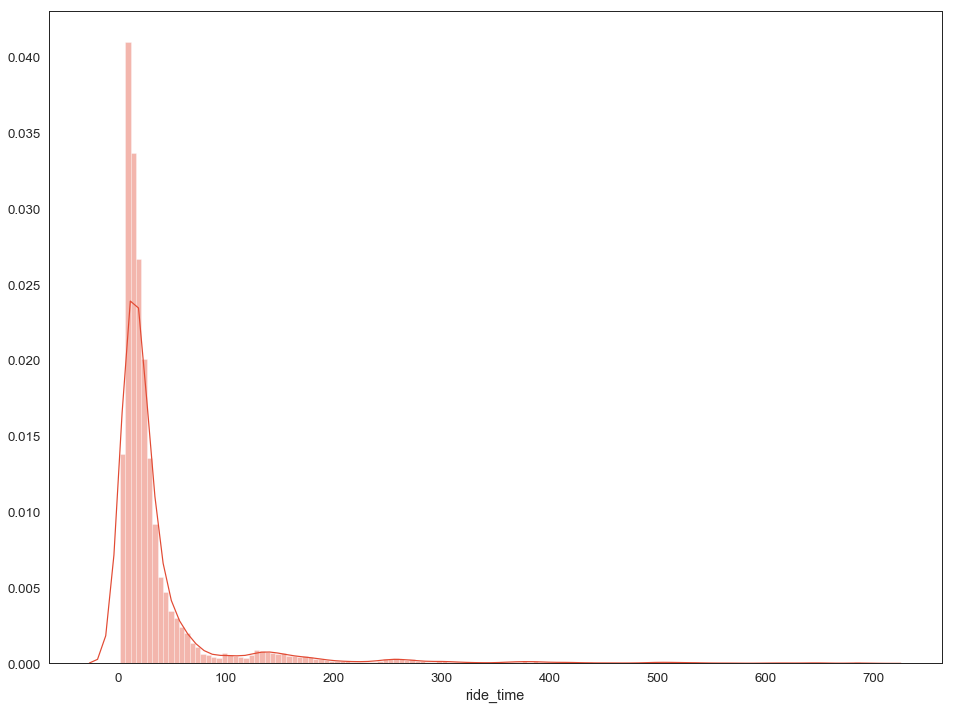

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

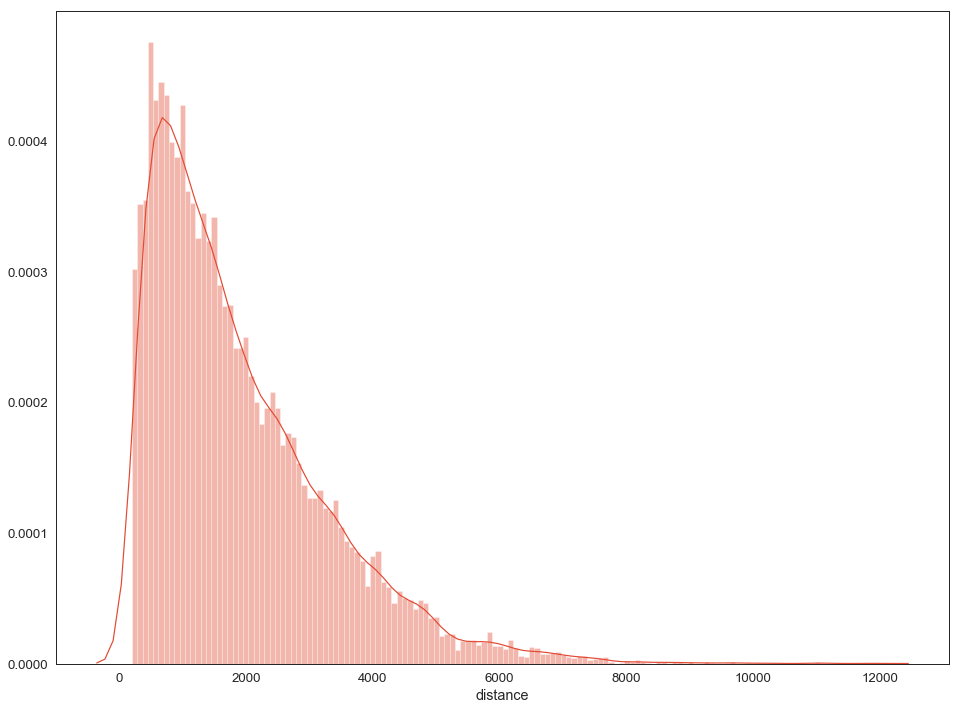

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
258,320,50.948217,6.986534,50.951742,6.991632,2021-01-02 13:34:02,2021-01-02 13:55:01,21.0,530.0,40619350,40634930,68.0,Ferdinandstraße 29,BIKE 21119,799
445,531,50.891485,6.990238,50.931135,6.933336,2021-01-08 19:34:02,2021-01-08 19:51:01,17.0,5948.0,40679767,40763288,5789.0,"Köln, Maternusstraße 25",BIKE 21658,755
581,711,50.957801,7.012450,50.975263,7.007377,2021-01-25 09:36:01,2021-01-25 09:51:01,15.0,1975.0,41116762,41118837,93.0,köln mühlheim bf,BIKE 21739,762
719,884,50.925685,6.922087,50.917189,6.906632,2021-01-15 09:25:02,2021-01-15 09:37:02,12.0,1438.0,40897520,40899208,88.0,Robert Koch Straße 21,BIKE 21931,784
797,988,50.971854,6.962319,50.965159,6.953397,2021-01-18 16:46:02,2021-01-18 17:21:01,35.0,972.0,40926700,40964921,2976.0,Gelsenkirchener Straße 30,BIKE 21556,762
1101,1347,50.975790,6.935109,50.957890,6.949132,2021-01-15 12:40:02,2021-01-15 13:23:01,43.0,2220.0,40901692,40902702,39.0,Etzelstraße 196,BIKE 22401,765
1102,1348,50.957890,6.949132,50.976138,6.949460,2021-01-15 13:35:01,2021-01-15 15:23:02,108.0,2030.0,40902702,40905627,12.0,Köln - Mehrheimerpl. 12.,BIKE 22401,777
1207,1512,50.956251,6.956109,50.926160,6.954817,2021-01-10 09:03:01,2021-01-10 09:17:02,14.0,3348.0,40789606,40791272,234.0,Köln - Neusser Str. 1,BIKE 21874,790
1323,1649,50.948306,6.954213,50.925715,6.958517,2021-01-02 15:06:01,2021-01-02 15:24:01,18.0,2531.0,40617905,40636945,1472.0,Weidengasse 54,BIKE 22389,804
1608,1994,50.931126,6.982150,50.937901,7.001727,2021-01-12 18:12:01,2021-01-12 18:40:01,28.0,1566.0,40843718,40845266,33.0,"Köln, Gebrüder-Coblenz-Straße 13",BIKE 21517,743


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
682,842,50.957918,7.011915,50.970009,7.014864,2021-01-29 10:03:01,2021-01-29 10:20:02,17.0,1361.0,41179269,41208994,2169.0,NaN,BIKE 21844,737
683,843,50.970009,7.014864,50.957870,7.012382,2021-01-29 18:45:01,2021-01-29 19:15:02,30.0,1361.0,41208994,41220338,505.0,NaN,BIKE 21844,753
917,1130,50.989958,6.891363,50.989645,6.894937,2021-01-21 07:59:02,2021-01-21 08:33:01,34.0,253.0,41018982,41022720,277.0,NaN,BIKE 22940,780
918,1131,50.989645,6.894937,50.989985,6.891360,2021-01-22 03:16:02,2021-01-22 03:26:02,10.0,253.0,41022720,41046085,1123.0,NaN,BIKE 22940,773
2367,2893,50.940986,6.959458,50.932451,6.939935,2021-01-14 17:46:01,2021-01-14 18:45:01,59.0,1665.0,40882797,40888067,193.0,NaN,BIKE 21993,794
2368,2895,50.932779,6.940178,50.939900,6.961070,2021-01-15 10:00:01,2021-01-15 11:08:02,68.0,1665.0,40888636,40899913,914.0,NaN,BIKE 21993,777
2689,3339,50.951217,6.907299,50.956289,6.904743,2021-01-21 23:09:01,2021-01-21 23:18:02,9.0,592.0,41033464,41043626,438.0,NaN,BIKE 22019,731
2690,3340,50.956289,6.904743,50.955201,6.913014,2021-01-22 00:55:01,2021-01-22 01:01:02,6.0,592.0,41043626,41044720,97.0,NaN,BIKE 22019,773
2906,3594,50.935426,7.011153,50.948742,7.008852,2021-01-06 10:52:01,2021-01-06 16:37:02,345.0,1490.0,40708832,40717353,180.0,NaN,BIKE 21112,797
2907,3595,50.948742,7.008852,50.935416,7.010976,2021-01-07 06:19:02,2021-01-07 07:27:02,68.0,1490.0,40717353,40727712,822.0,NaN,BIKE 21112,768


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
6093,7643,50.964204,6.899715,50.974296,6.969615,2021-01-04 01:18:01,2021-01-04 01:20:02,2.0,5023.0,40587315,40662763,4398.0,NaN,BIKE 210191,814,1500.0
7442,9352,50.947471,6.887938,50.975524,6.973185,2021-01-16 21:51:01,2021-01-16 22:00:02,9.0,6738.0,40906351,40933483,1799.0,NaN,BIKE 21670,761,6500.0
8307,10391,50.952586,6.951538,50.976403,7.006880,2021-01-17 01:26:01,2021-01-17 01:34:01,8.0,4696.0,40894592,40935725,2808.0,NaN,BIKE 210000,811,4000.0
10404,12937,50.931080,6.917282,50.928926,6.939616,2021-01-20 13:20:01,2021-01-20 13:23:02,3.0,1584.0,40987846,41002964,1089.0,NaN,BIKE 22962,737,1500.0
13988,17600,50.907094,6.905530,50.943527,6.933384,2021-01-17 11:15:02,2021-01-17 11:22:01,7.0,4498.0,40935934,40940380,556.0,NaN,BIKE 22708,800,4000.0
16443,20692,50.932890,6.903665,50.921122,6.958265,2021-01-06 20:08:01,2021-01-06 20:16:01,8.0,4046.0,40696001,40721586,1732.0,NaN,BIKE 22051,785,4000.0
16470,20724,50.974107,6.956253,50.949870,7.001239,2021-01-29 09:14:01,2021-01-29 09:22:01,8.0,4147.0,41199563,41208026,791.0,NaN,BIKE 22051,756,4000.0
18249,22939,50.923016,6.940135,50.918268,6.960446,2021-01-29 11:49:02,2021-01-29 11:52:02,3.0,1519.0,41210304,41210512,6.0,NaN,BIKE 21248,752,1500.0
18365,23081,50.940359,6.886281,50.946616,6.945910,2021-01-30 15:57:02,2021-01-30 15:59:02,2.0,4237.0,41208945,41236841,1779.0,NaN,BIKE 22259,755,1500.0
19527,24476,50.936700,6.925819,50.937567,6.867957,2021-01-27 16:06:01,2021-01-27 16:10:01,4.0,4057.0,41171135,41171569,11.0,NaN,BIKE 21030,738,4000.0


In [46]:
len(unmatched_distances)

12

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                      23550
Unbekannt                                    2
Köln - Geisbergstr.                          1
Schleidenerstr. 19                           1
Dr.-Simons-Straße 7                          1
Kierberger Straße 14                         1
Tante Olga                                   1
Köln, Waisenhausgasse 9                      1
Köln, Altbaumburgweg 12                      1
Gelsenkirchener Straße 30                    1
Landmannstraße 27                            1
Lechenicher Str. 1 50937 Köln                1
Köln, Eigelstein 80                          1
Riehlerstr. 231                              1
Köln - Neusser Str. 1                        1
Rheinenergiestadion                          1
Köln, Neumarkt 2                             1
Trittenheimer Straße 4                       1
Köln, Remscheider Straße 16                  1
Zollstockgürtel 130                          1
\t Freiligrathstraße 55                      1
Kuenstraße 4 

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-01.csv', sep=';', index=False) 

In [52]:
len(df_c)

23670